In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('train.csv/train.csv')

In [3]:
dataset

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [4]:
dataset.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [5]:
X = dataset[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z']]

In [6]:
y = dataset['price']

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
categorical_columns = dataset.columns[dataset.dtypes == object ]

In [9]:
numerical_columns = dataset.columns[dataset.dtypes != object]

In [10]:
numerical_columns

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [65]:
dataset['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [11]:
dataset.corr(numeric_only=True)

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.000771,0.002647,0.002448,-0.000476,-0.000448,0.000037,-0.001392
carat,-0.000771,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.002647,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.002448,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,-0.000476,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,-0.000448,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.000037,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,-0.001392,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


<Axes: >

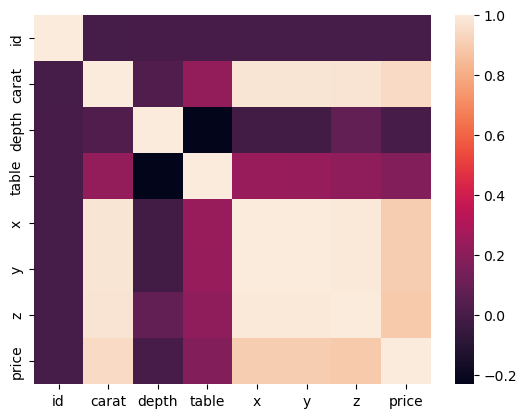

In [12]:
sns.heatmap(dataset.corr(numeric_only=True) )

In [ ]:
for i in numerical_columns:
    sns.countplot(data= dataset, x=dataset[i])
    print('\n')
    plt.show()

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
dataset.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [15]:
dataset['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [16]:
dataset['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [17]:
dataset['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [18]:
oe = OrdinalEncoder(categories=[['Fair', 'Good','Very Good','Premium','Ideal'],
                                ['D','E','F','G','H','I','J'], 
                                ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'] ])

In [22]:
ordinal = X.iloc[:,1:4]

In [23]:
ordinal

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [24]:
ordinal = pd.DataFrame(oe.fit_transform(ordinal) , columns=['cut', 'color' ,'clarity'])

In [27]:
ordinal

,cut,color,clarity
0,3.0,2.0,3.0
1,2.0,6.0,1.0
2,4.0,3.0,4.0
3,4.0,3.0,4.0
4,3.0,3.0,3.0
...,...,...,...
193568,4.0,0.0,5.0
193569,3.0,3.0,5.0
193570,2.0,2.0,2.0
193571,2.0,0.0,2.0


In [ ]:
X.drop(['color','cut','clarity'],axis=1 , inplace=True)

In [31]:
X

,carat,depth,table,x,y,z
0,1.52,62.2,58.0,7.27,7.33,4.55
1,2.03,62.0,58.0,8.06,8.12,5.05
2,0.70,61.2,57.0,5.69,5.73,3.50
3,0.32,61.6,56.0,4.38,4.41,2.71
4,1.70,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67
193569,0.70,60.3,58.0,5.75,5.77,3.47
193570,0.73,63.1,57.0,5.72,5.75,3.62
193571,0.34,62.9,55.0,4.45,4.49,2.81


In [34]:
X = pd.concat([X, ordinal ], axis=1, )

<Axes: >

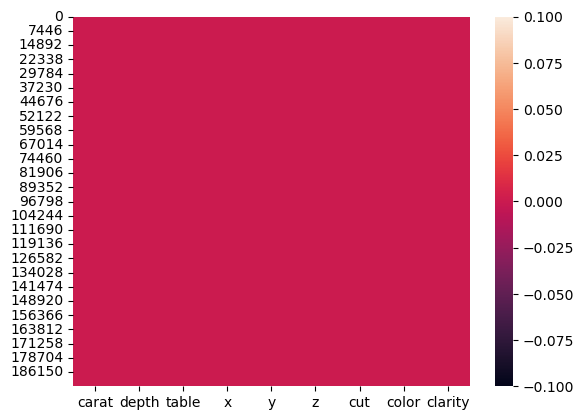

In [39]:
sns.heatmap(X.isnull())

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
X_train

,carat,depth,table,x,y,z,cut,color,clarity
83475,0.32,61.6,58.0,4.38,4.41,2.71,3.0,1.0,2.0
160324,1.20,62.6,57.0,6.81,6.76,4.25,3.0,2.0,3.0
101740,1.50,62.2,55.0,7.30,7.26,4.53,4.0,5.0,3.0
180341,1.67,61.9,59.0,7.65,7.61,4.71,3.0,5.0,1.0
48480,1.00,63.7,60.0,6.34,6.30,4.02,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
119879,0.50,60.2,61.0,5.11,5.15,3.09,2.0,1.0,2.0
103694,1.91,62.3,62.0,7.85,7.79,4.87,2.0,2.0,2.0
131932,1.22,62.8,58.0,6.82,6.74,4.26,3.0,3.0,3.0
146867,0.31,61.1,56.0,4.37,4.40,2.67,2.0,3.0,6.0


In [71]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train,y_train)

LinearRegression()

In [77]:
model.coef_

array([13855.59751824,  -120.09300028,   -35.92747832, -1595.48765044,
        -371.37906589,  -118.14040593,    70.64493874,  -285.79971616,
         434.50933649])

In [78]:
model.intercept_

13359.567644550594

In [79]:
y_pred = model.predict(X_test)

In [81]:
model.score(X_test,y_test)

0.9372975155452953

In [58]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [57]:
mean_squared_error(y_test ,y_pred)

1013245.5452810926

In [59]:
mean_absolute_error(y_test,y_pred)

671.5856392794335

In [61]:
score = r2_score(y_test,y_pred)

In [62]:
score*100

93.72975155452953

In [82]:
import pickle
with open('DiamondPricePrediction.pickle','wb') as f:
    pickle.dump(model,f)

In [83]:
import json 
columns ={
    'data_columns':[col.lower() for col in X.columns ]
}
with  open ('columns.json', 'w') as f:
    f.write(json.dumps(columns))

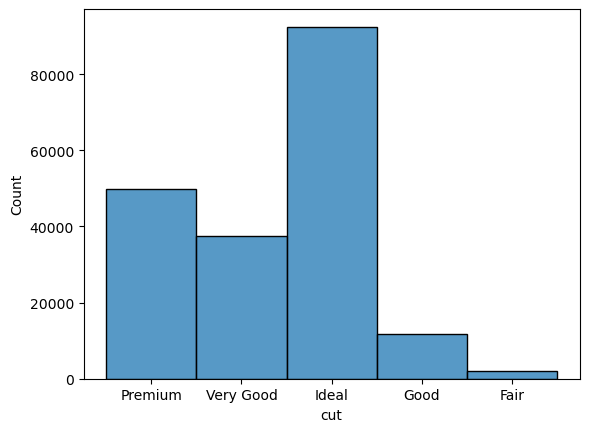

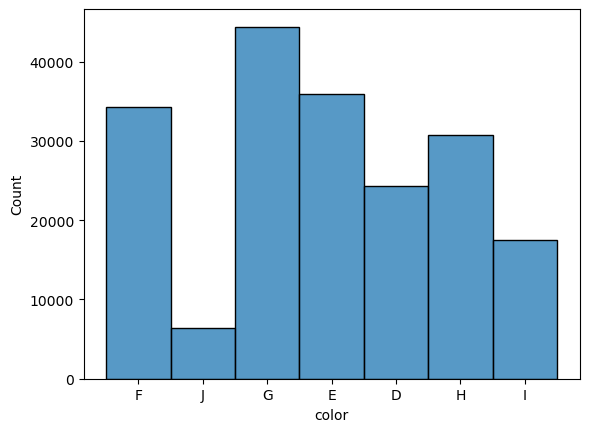

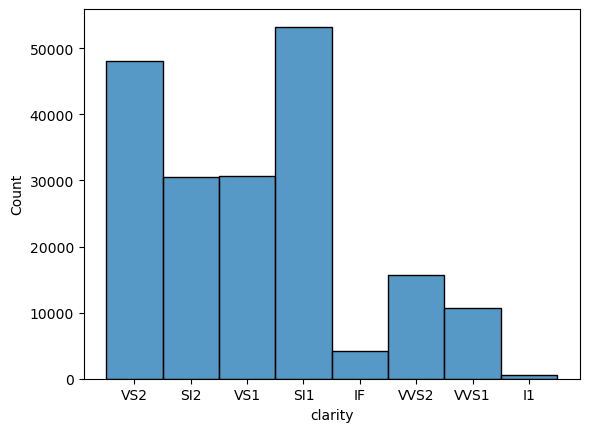

In [68]:
for i in categorical_columns:
  sns.histplot(data=dataset,x=dataset[i])
  print('\n')
  plt.show()

In [69]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [72]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

In [73]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)
    print((y_pred.mean()))

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

3957.1495661936
LinearRegression
Model Training Performance
RMSE: 1006.6009861315916
MAE: 671.5856392794335
R2 score 93.72975155452953


3957.187896883573
Lasso
Model Training Performance
RMSE: 1007.1191357898709
MAE: 673.8842693285042
R2 score 93.72329464989772


3957.1616029744346
Ridge
Model Training Performance
RMSE: 1006.6231667015915
MAE: 671.7178248841257
R2 score 93.72947522017505


3966.814197327269
Elasticnet
Model Training Performance
RMSE: 1669.4403853251729
MAE: 1150.3598332587485
R2 score 82.7530669820024


